<a href="https://colab.research.google.com/github/Lucas-Melo-A-S/Data_Science/blob/main/Analise_do_Panorama_do_COVID_19_no_Brasil_Lucas_Melo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Mundo e no Brasil



#Covid
  No ano de 2019, foi descoberto um tipo de patogeno que resultou em uma surto continuo de pneumonia viral na região de Wuhan, na provincia de Hubei na China. Após analises feitas pela OMS(Organização Mundial da Saúde), constatou-se que se tratava do COVID-19 que era causada por um novo tipo de coronavirus(Sars-Cov-2)(WHO,2020a).
  De inicio a OMS não deu muita atenção para aquele surto, pois o coronvirus que era conhecido desde 1960 apenas causava "resfriados comuns" na pessoas. Mas de acordo com Paules   et   al.   (2020) " ... No  século  XXI,  2  HCoVs  altamente atogênicos - coronavírus  da  síndrome  respiratória  aguda  grave  (SARS-CoV)  e  coronavírus da  síndrome  respiratória  do  Oriente  Médio  (MERS-CoV) - emergiram  de  reservatórios  de animais para causar epidemias globais com alarmante morbidade e mortalidade...". E esse tipo de Covid se alastrou por todo mundo causando milhares de mortes e causando diversos efeitos colaterais nas pessoas que o pegaram.Até o momento(24.01.2022) os pesquisadores não tem total conhecimento sobre todos os efeitos do Covid-19 e por que apenas algumas pessoas tenham uma carga viral maior que outras pessoas.



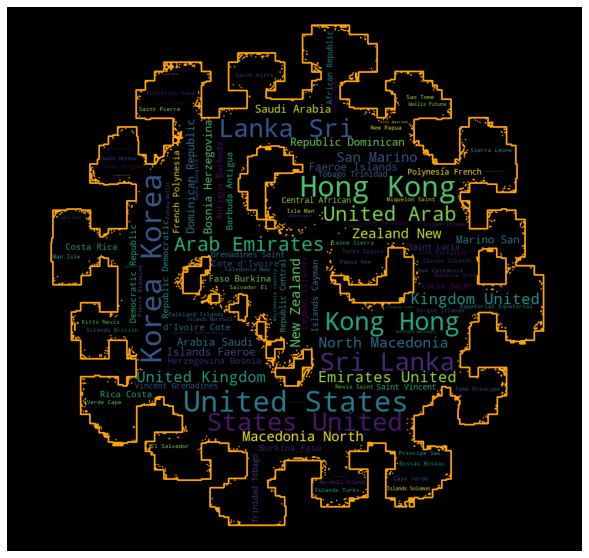

In [95]:
#@title
#Colocando a imagem

imagem = np.array(Image.open("/content/covid19- 4.jpg"))

#Gerando o wordbloud 

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=1080,max_words=400, mask=imagem, max_font_size=100,min_font_size=1,contour_width=3,contour_color='orange').generate(all_locations)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("covid_location_wordcloud.png",)

# Obtenção dos Dados

Ao longo desses ultimos 2 anos, diversos estudos foram e são feitos para entender como o virus funciona, e como é sua curva de crescimento. Esse presente estudo busca lucidar como se encontra a atual situação Mundial do covid, expondo também a situação do Brasil após esses dois anos de pandêmia.

Para a realização desse artigo, foi-se necessario verificar em diversos bancos de dados a veracidade do DataFrame utilizado, poís como se trata de algo Mundial, diversas informações podem conflitar devido ao controle de informações existentes nos Países onde os dados foram recolhidos,também gostaria de deixar claro que como ainda estamos na pandemia, os numeros poderão mudar diariamente e que esse estudo leva em consideração a data final de 24/01/2022(24 de Janeiro de 2022).


### Dados do COVID-19

* Os dados retirado são do profile "Our World in Data", onde eles atualizaram **DIARIAMENTE** o dataframe sobre a pandemia e para qualquer tipo de estudos futuros, o link do GitHub onde eles hospedam todos o dataframe atualizado [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data).

### Dicionário de Variáveis
* Para melhor compreendimento do leitor, será exposto um dicionario com todas as variaveis presentes no Data Frame apresentado:
[https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv)




In [100]:
#@title
dfdic

,column,source,category,description
0,iso_code,International Organization for Standardization,Others,ISO 3166-1 alpha-3 – three-letter country codes
1,continent,Our World in Data,Others,Continent of the geographical location
2,location,Our World in Data,Others,Geographical location
3,date,Our World in Data,Others,Date of observation
4,total_cases,COVID-19 Data Repository by the Center for Sys...,Confirmed cases,Total confirmed cases of COVID-19
...,...,...,...,...
62,human_development_index,United Nations Development Programme (UNDP),Others,A composite index measuring average achievemen...
63,excess_mortality,"Human Mortality Database (2021), World Mortali...",Excess mortality,Percentage difference between the reported num...
64,excess_mortality_cumulative,"Human Mortality Database (2021), World Mortali...",Excess mortality,Percentage difference between the cumulative n...
65,excess_mortality_cumulative_absolute,"Human Mortality Database (2021), World Mortali...",Excess mortality,Cumulative difference between the reported num...


<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

In [25]:
#@title
#Obtendo o WordCloud
!pip install wordcloud -q

In [96]:
#@title
# importar as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime


# importar o dataset COVID-19 para um DataaFrame
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
dic = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv'
df = pd.read_csv(url)
dfw = pd.read_csv(url)
dfdic= pd.read_csv(dic)


O Dataframe selecionou 219 países para esse estudo, onde: 
* America do Norte/Central: 36 países;
* America do Sul: 13 países;
* Asia: 46 países;
* Africa: 59 países;
* Europa: 51 países;
* Oceania: 13 países;
* Alguns computados no Dataframe são dados como águas internacionais.

Os dados do DataFrame começaram a ser preenchidos na data de 24.02.2020 tendo sua data final no dia 26.01.2022

In [27]:
#@title
#Visualizando o DataFrame

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [28]:
#@title
#Definindo o tamanho do dataframe
print(df.shape)
df.describe()


(157476, 67)


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.546260e+05,1.545790e+05,1.534280e+05,1.371650e+05,137341.000000,137209.000000,153906.000000,153859.000000,152713.000000,136458.000000,136634.000000,136502.000000,119040.000000,21262.000000,21262.000000,22658.000000,22658.000000,4391.000000,4391.000000,9563.000000,9563.000000,6.478900e+04,6.584900e+04,65849.000000,64789.000000,7.977400e+04,79055.000000,75071.000000,74323.000000,4.152100e+04,3.956000e+04,3.663100e+04,1.409400e+04,3.448500e+04,7.604900e+04,41521.000000,39560.000000,36631.000000,14094.000000,76049.000000,7.503100e+04,75031.000000,123432.000000,1.564390e+05,140177.000000,130647.000000,129229.000000,129946.000000,131247.000000,86501.000000,129632.000000,136423.000000,100538.000000,99094.000000,64932.000000,117240.000000,146985.000000,129107.000000,5.420000e+03,5420.000000,5420.000000,5420.000000
mean,2.247851e+06,9.898372e+03,9.680280e+03,5.440326e+04,170.051987,169.371307,25004.426917,132.539295,128.160429,474.114365,1.644383,1.634397,1.013653,903.094394,22.710775,4046.866272,158.740382,494.998861,17.912694,5949.388895,96.445718,6.485221e+04,1.558239e+07,659.054879,2.986309,8.185904e+04,2.725054,0.089245,227.523201,1.500778e+08,7.862837e+07,5.924627e+07,1.155872e+07,1.139204e+06,5.315806e+05,65.781398,35.473097,29.685164,8.110705,3417.556023,2.504455e+05,0.160329,54.906466,1.480357e+08,464.967395,30.579389,8.768531,5.538199,19666.542699,13.556776,259.940674,8.204351,10.629099,32.767527,50.799517,3.028240,73.580825,0.725769,3.525649e+04,9.022924,15.896659,890.862197
std,1.337419e+07,7.104786e+04,6.638541e+04,2.856296e+05,828.742555,808.422748,41252.961582,542.403072,383.685730,742.353206,5.066018,3.622514,0.361908,2724.509880,26.052686,11549.772421,207.316554,650.191466,20.871436,14903.042741,105.602271,2.110494e+05,5.884862e+07,1571.030780,8.189656,3.493527e+05,6.916266,0.099326,4344.899672,6.867053e+08,3.633657e+08,2.876087e+08,5.530373e+07,4.269510e+06,2.866654e+06,59.560676,28.184674,26.808679,13.336321,4026.553774,2.281617e+06,0.260399,20.564794,7.069894e+08,2146.589359,9.100958,6.147981,4.187434,20653.648680,20.010944,119.846673,4.489120,10.560677,13.516492,31.810958,2.451397,7.496512,0.149974,9.984691e+04,16.458611,30.476804,1341.901541
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,-75.911000,-10.844000,-0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [29]:
#@title
#Verificando as colunas 
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [30]:
#@title
# Verificando os tipos
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [31]:
#@title
#Transformando a coluna date em datatime
df.date = pd.to_datetime(df.date,format="%Y-%m-%d")

In [32]:
#@title
df.date.sort_values(ascending= False)

157475   2022-01-26
8424     2022-01-26
86112    2022-01-26
39797    2022-01-26
142940   2022-01-26
            ...    
5551     2020-01-02
92807    2020-01-02
112821   2020-01-01
92806    2020-01-01
5550     2020-01-01
Name: date, Length: 157476, dtype: datetime64[ns]

In [33]:
#@title
df.date.max()

Timestamp('2022-01-26 00:00:00')

In [34]:
#@title
#Verificando o numero de null/nan
df_null = df.isnull().sum()/df.shape[0]
df_null.sort_values(ascending=False)


weekly_icu_admissions                      0.972116
weekly_icu_admissions_per_million          0.972116
excess_mortality_cumulative_per_million    0.965582
excess_mortality                           0.965582
excess_mortality_cumulative_absolute       0.965582
                                             ...   
total_cases                                0.018098
population                                 0.006585
date                                       0.000000
location                                   0.000000
iso_code                                   0.000000
Length: 67, dtype: float64

# Analise Geral do COVID-19

In [35]:
#@title
#df = df.reset_index('date')

In [36]:
#@title
#Verificando Países com maior numero de covid na ultima data
df_lastday_covid = df.loc[(df.date == '2022-01-14') & (df.location != 'World')].sort_values(by='total_deaths',ascending = False)
# df_lastday_ocountrys = df_lastday_covid.loc[(df.location != 'High income') & 
#                                             (df.location != 'Europe') &
#                                             (df.location != 'Asia') &
#                                             (df.location != 'North America') &
#                                             (df.location != 'Lower middle income') &
#                                             (df.location != 'South America') &
#                                             (df.location != 'European Union') &
#                                             (df.location != 'Upper middle income')
#                                             ]

df_lastday_ocountrys = df_lastday_covid.dropna(subset = ['continent'], axis = 0)
# df_lastday_ocountrys.head(20)

print(df_lastday_ocountrys[['location','total_deaths']])

                         location  total_deaths
149589              United States      851328.0
20868                      Brazil      621063.0
66720                       India      485752.0
117895                     Russia      313458.0
93550                      Mexico      300912.0
...                           ...           ...
122224                      Samoa           NaN
128029  Sint Maarten (Dutch part)           NaN
129913            Solomon Islands           NaN
142928                      Tonga           NaN
152828                    Vatican           NaN

[219 rows x 2 columns]


Um fator que facilitou a proliferação desse virus ao longo do globo foi a sua facilidade de transmissão, onde atravês inalação de gotículas do nariz ou da boca que se espalham quando alguém doente tosse ou espirra ou também ao tocar em objetos contaminados pelas goticulas que caem nas superficies destas.

Pode se observar no gráfico abaixo de novos casos que o virus teve uma rapída proliferação no ano de 2020 e inicio de 2021, que mesmo com todas as medidas santiarias, quarentena e "tratamentos testes" não foi possivel retardar o crescimento do numero casos nos ultimos anos.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


361975516.0


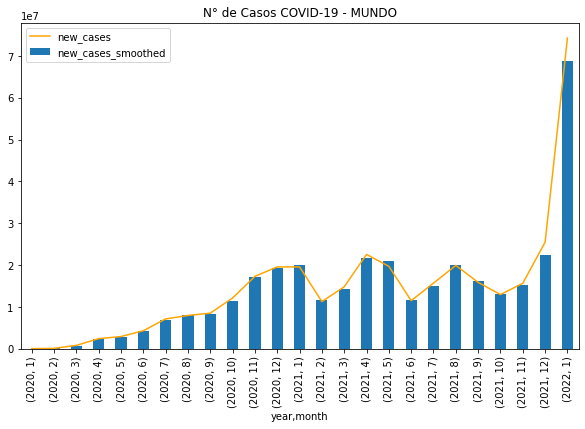

In [64]:
#@title
df_wrld = df.copy()

df_wrld = df_wrld.dropna(subset = ['continent'], axis = 0)


df_wrld['year'] = df_wrld.date.dt.year
df_wrld['month'] = df_wrld.date.dt.month

df_wrld

df_wrld_c = df_wrld.groupby(['year','month'])['new_cases'].sum()
df_wrld_cs = df_wrld.groupby(['year','month'])['new_cases_smoothed'].sum()

print(df_wrld_c.sum())

figure,ax3 = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

df_wrld_c.plot(kind='line',ax=ax3,color='orange')
df_wrld_cs.plot(kind='bar',ax=ax3, title = 'N° de Casos COVID-19 - MUNDO')
plt.legend()


Podemos verificar que com a aparição da nova variante do Covid - 19 (Omicron) que de acordo com os especilistas o seu nivel de trasmissão é maior que qualquer outra variante, o mês de Janeiro de 2022 teve um aumento fora da curva no numero de casos. Até o momento o mundo já teve ***361.975.516,0*** casos de covid

Todos os países foram pegos de surpresa com essa pandemia e muitos países não tiveram tempo e nem renda para se preparem para toda essa calamidade que o Covid-19 iria causar, e com isso junto com o crescimento do numero de casos, veio o aumento do numeor de mortes.

Para melhor entendimento da pandemia pelo mundo, os casos foram separadas por continente e logo depois pelos 5 países com mais casos, com isso nos podemos observar a real situação em cada continente.

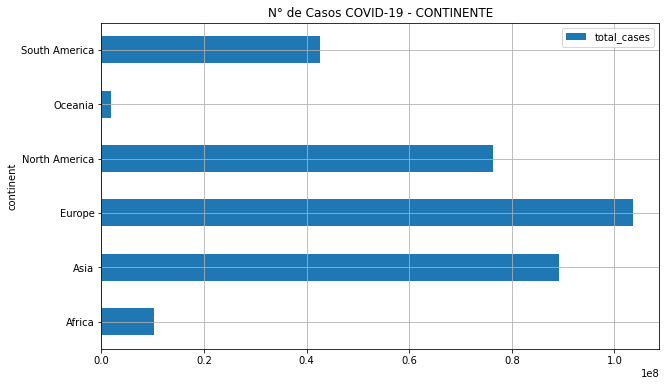

In [87]:
#@title
df_cont = df_lastday_ocountrys.groupby('continent')['total_cases'].sum()
# print(df_cont.sort_values(ascending=False))

figure,ax5 = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

df_cont.plot(kind='barh',ax=ax5, title = 'N° de Casos COVID-19 - CONTINENTE',grid=True)
plt.legend()



O numero total de casos por continente:

Europe     ==      103585798.0

Asia       ==       89216857.0

North America  ==   76369457.0

South America  ==   42571736.0

Africa     ==       10289709.0

Oceania     ==       1784263.0

Foi feita um divisão do numero de casos por continente para termos o conhecimento dos países que tiveram mais casos somente em seu continente.

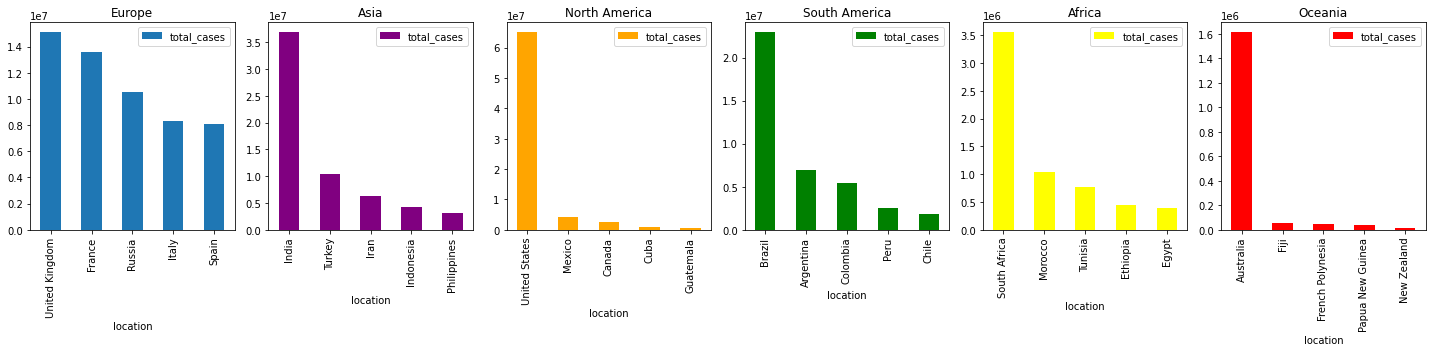

In [39]:
#@title

figure,[ax6,ax7,ax8,ax9,ax10,ax11] = plt.subplots(nrows=1,ncols=6,figsize=(20,5))

df_europe = df_lastday_ocountrys.loc[df_lastday_ocountrys.continent=='Europe']
df_europe = df_europe.sort_values('total_cases',ascending = False).head()
df_europe.plot(x='location', y ='total_cases',ax=ax6,kind= 'bar',title = 'Europe')

df_asia = df_lastday_ocountrys.loc[df_lastday_ocountrys.continent=='Asia']
df_asia = df_asia.sort_values('total_cases',ascending = False).head()
df_asia.plot(x='location', y ='total_cases',ax=ax7,kind= 'bar',title = 'Asia',color='purple')

df_na = df_lastday_ocountrys.loc[df_lastday_ocountrys.continent=='North America']
df_na = df_na.sort_values('total_cases',ascending = False).head()
df_na.plot(x='location', y ='total_cases',ax=ax8,kind= 'bar',title = 'North America',color='orange')

df_sa = df_lastday_ocountrys.loc[df_lastday_ocountrys.continent=='South America']
df_sa = df_sa.sort_values('total_cases',ascending = False).head()
df_sa.plot(x='location', y ='total_cases',ax=ax9,kind= 'bar',title = 'South America',color='green')

df_africa = df_lastday_ocountrys.loc[df_lastday_ocountrys.continent=='Africa']
df_africa = df_africa.sort_values('total_cases',ascending = False).head()
df_africa.plot(x='location', y ='total_cases',ax=ax10,kind= 'bar',title = 'Africa',color='yellow')

df_oceania = df_lastday_ocountrys.loc[df_lastday_ocountrys.continent=='Oceania']
df_oceania = df_oceania.sort_values('total_cases',ascending = False).head()
df_oceania.plot(x='location', y ='total_cases',ax=ax11,kind= 'bar',title = 'Oceania',color='red')

plt.tight_layout()

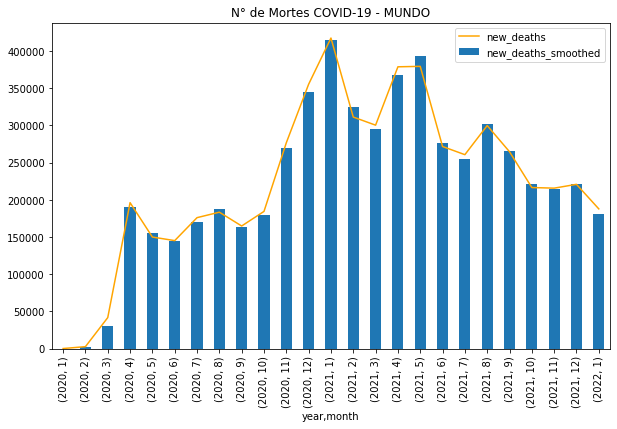

In [40]:
#@title
df_wrld_d = df_wrld.groupby(['year','month'])['new_deaths'].sum()
df_wrld_ds = df_wrld.groupby(['year','month'])['new_deaths_smoothed'].sum()

figure,ax4 = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

df_wrld_d.plot(kind='line',ax=ax4,color='orange')
df_wrld_ds.plot(kind='bar',ax=ax4, title = 'N° de Mortes COVID-19 - MUNDO')
plt.legend()


Como foi possivel observar no grafico acima, o numero de mortes vem caindo grativamente, isso se deu devido a criação de vacinas que ao longo de todo o ano de 2021 foi feito um multirão mundial para que toda a populção tivesse pelo menos uma das doses dos imunizantes.

Podemos também relatar que essa nova variante(Omicron) tem um baixo nivel de fatalidade, sendo essa a variante que está em predominio no mundo atualmente.

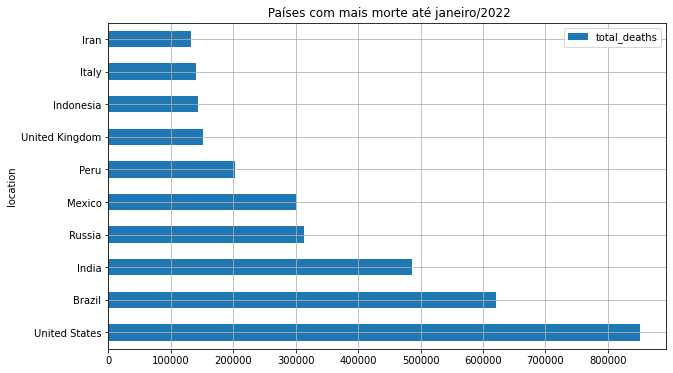

In [86]:
#@title
#Plotar um gráfico de barras para os 5 países com mais mortes

figure,ax = plt.subplots()

df_countriest10 = df_lastday_ocountrys.head(10)

df_countriest10.plot(x='location',y='total_deaths',kind='barh',ax=ax,grid=True,title =' Países com mais morte até janeiro/2022',figsize=(10,6))

# df_countriest10.groupby('location')['total_deaths'].max().sort_values(ascending=False) - Para verificar a quantidade em numeros inteiros



De acordo com a analise feita, esses foram os 10 países mais afetados pela o COVID-19 em relação a mortes e esses também são os países que se destacam no graficos de casos de covid-19 por continente, mostrando que o numero de casos está diretamente relacionado com o numero de mortes , sendo o Estados Unidos país com maior destaque nesses ultimos anos com 851.328,0.

*3 países que mais tiveram mortes causadas pelo Covid-19:*

**United States  ==   851328.0**

**Brazil           == 621063.0**

**India          ==   485752,0**

Fazendo uma rapida analise no gráfico de dispersão, chegou-se a conclusão que o virus não escolhe entre países pobres e ricos, o virus está para todos da mesma maneira e que devemos nos cuidar diariamente para acelerar o termino dessa pandemia.

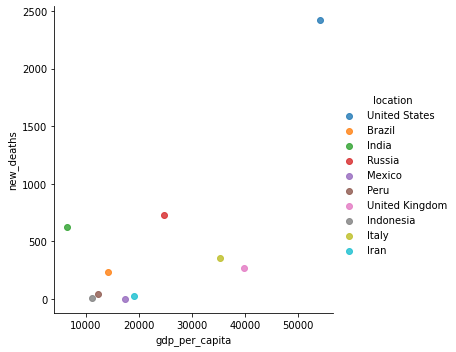

In [42]:
#@title
# Plotar um gráfico de dispersão considerando gdp_per_capita (ou seja, o PIB dos países) pelo número total de mortos.
df_t = df_countriest10[['location','gdp_per_capita','new_deaths']]
sbn.lmplot(x='gdp_per_capita', y ='new_deaths',data = df_t,hue='location')

# Analise do Covid-19 no Brasil

Será feito uma analise do Covid-19 no Brasil, como foi seu crescimento e como está a sua situação agora.

In [43]:
#@title
df_brazil = df.loc[df.location == 'Brazil'].copy()

In [44]:
#@title
df_brazil.date=pd.to_datetime(df_brazil.date,format='%Y-%m-%d')

In [45]:
#@title
df_br = df_brazil.copy()

df_br['year'] = df_br.date.dt.year
df_br['month'] = df_br.date.dt.month


Nesses ultimos anos de pandemia o país vem passando por muitos altos e baixos em relação a quantidade de numeros de casos e mortes no país. Teve um determinado momento entre o meses de março e julho o país chegou a ser Epicentro da pandemia devido a surgimento da variante DELTA no país.

Muitos fatores internos influenciaram na rápida propaganção do virus no país mas nesse momento não vem a caso, o primeiro caso de Covid no país se deu no dia 26.02.2020 na cidade de São Paulo e desde então esse numero vem crescendo  ao longo dos ultimos meses.

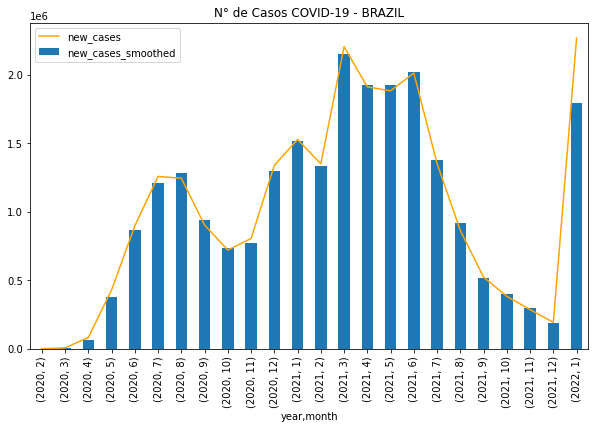

In [105]:
#@title
df_br_c = df_br.groupby(['year','month'])['new_cases'].sum()
df_br_cs = df_br.groupby(['year','month'])['new_cases_smoothed'].sum()

# print(df_br_c)

figure,ax = plt.subplots(nrows=1,ncols=1,figsize = (10,6))

df_br_c.plot(kind='line',ax=ax,color='orange')
df_br_cs.plot(kind='bar',ax=ax, title = 'N° de Casos COVID-19 - BRAZIL')
plt.legend()


Como mostra o grafico, o numero de casos no país sempre se manteve em alta, principalmente durante os meses de julho/2020 e julho/2021 foi um ano onde o numero mensal de casos de covid ultrapassava os 500 mil, tendo seu pico em Março/2021 com 2205301.0 casos. Durante esse tempo, o país passou por diversas situações e uma delas o país acabou sendo considerada o Epicentro da pandemia(como relatado anteriomente).

Infelizmente, junto com o aumento do numero de casos veio o aumento do numero de mortes chegando a ser registrado 4.249 mortes em 24 horas. O país teve um picos de mortes no mês de Abril/2021 onde chegou a incriveis 82392.0 mortes no mês.

Mas no mês seguinte se deu inicio a uma queda dratica no numero de casos e mortes, e isso se deu devido a diversos fatores mas principalmente a vacinação (assunto que será tratado mais a frente).

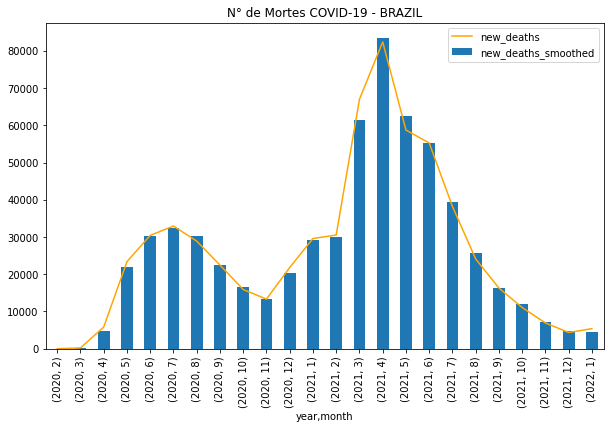

In [104]:
#@title
df_br_d = df_br.groupby(['year','month'])['new_deaths'].sum()
df_br_ds = df_br.groupby(['year','month'])['new_deaths_smoothed'].sum()

# print(df_br_d)


figure,ax= plt.subplots(nrows=1,ncols=1,figsize = (10,6))


ax.get_xaxis().set_visible(False)
df_br_d.plot(kind='line',ax=ax,color='orange')
df_br_ds.plot(kind='bar',ax=ax,title= 'N° de Mortes COVID-19 - BRAZIL')
ax.get_xaxis().set_visible(True)
plt.legend()


No inicio do ano de 2021 o país começou a sua agenda de vacinação contra o covid, de inicio a vacinação começou apenas com a CoronaVac, onde de acordo com os especialistas seria necessario no minimo duas doses da vacina para está protegido da doença mas com o passar dos meses novos tipos de vacinas foram sendo liberadas no país e agenda de vacinação no país cresceu rápidamente ao longo de todo o ano de 2021.

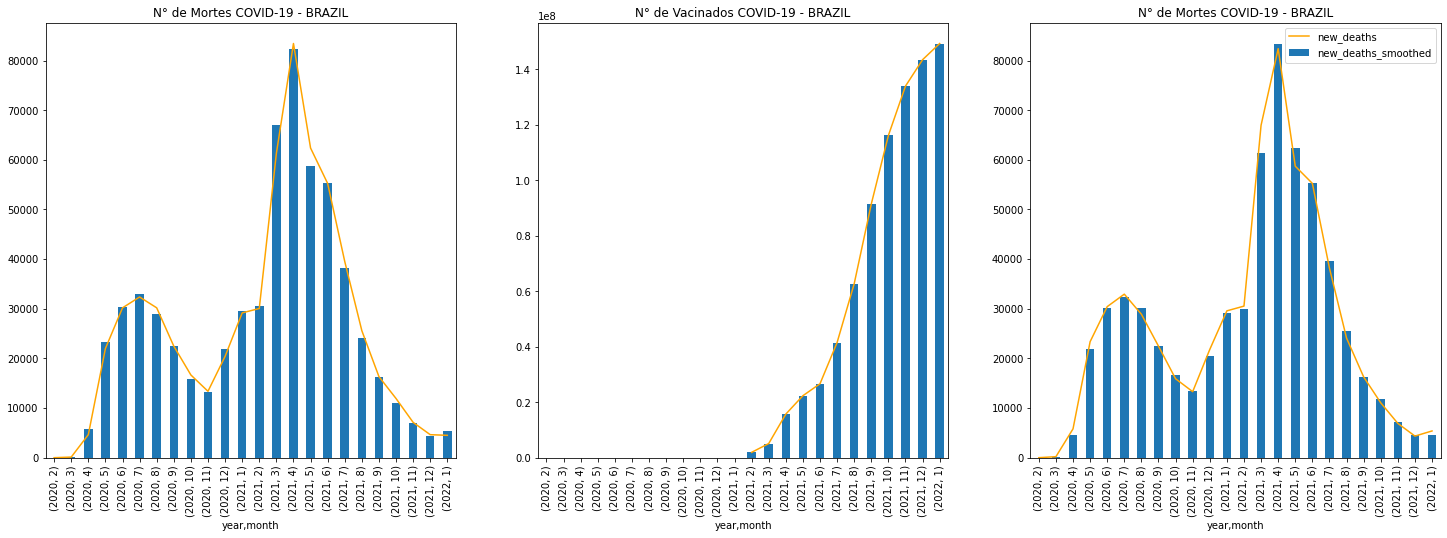

In [112]:
#@title
df_br_va = df_br.groupby(['year','month'])['people_fully_vaccinated'].max()

figure,(ax,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize = (25,8))


ax.get_xaxis().set_visible(False)
df_br_d.plot(kind='line',ax=ax2,color='orange')
df_br_ds.plot(kind='bar',ax=ax2,title= 'N° de Mortes COVID-19 - BRAZIL')
ax.get_xaxis().set_visible(True)
plt.legend()


ax1.get_xaxis().set_visible(False)
df_br_va.plot(kind='line',ax=ax1, color='orange',title ='N° de Vacinados COVID-19 - BRAZIL')
df_br_va.plot(kind='bar',ax=ax1)
ax1.get_xaxis().set_visible(True)
plt.legend()


ax.get_xaxis().set_visible(False)
df_br_ds.plot(kind='line',ax=ax, color='orange',title= 'N° de Mortes COVID-19 - BRAZIL')
df_br_d.plot(kind='bar',ax=ax)
ax.get_xaxis().set_visible(True)
plt.legend()

Como podemos ver nos graficos acima o crescimento do numero de vacinados tem total influencia na queda de novos casos e mortes pela covid. O efeitos vacina acaba sendo inversamente proporcional ao numero de casos e mortes, quantos mais vacinados menos casos e mortes temos. Hoje em dia são 149273731.0 pessoas com o ciclo vacinal completo(duas doses) no páis.

***POR ISSO VACINE-SE!.***

* Podemos observar que no mês de janeiro/2022 o numero de casos de covid aumentou draticamente se comparados aos passados, isso se deu devido a aparição de uma nova multação do virus chamada 'OMICRON', onde este virus tem a maior taxa de proliferação entre as multações já descobertas. Mas em contra partida podemos observar que o numero de mortes continuou desscendo, isso se aconteceu tanto devido a vacina mas também ao nivel de letalidade dessa nova multação que é um dos mais baixos entre as multações.

# Worldcloud


In [113]:
#@title
dfw_ocountrys = dfw.dropna(subset = ['continent'], axis = 0)

In [114]:
#@title
# ver a quantidade de valores ausentes
print("Valores ausentes para description: ", dfw_ocountrys.location.isnull().sum())

# eliminar as colunas com valores ausentes
location = dfw_ocountrys.dropna(subset=['location'], axis=0)['location']


Valores ausentes para description:  0


In [115]:
#@title
all_locations = " ".join(s for s in location)

print(f'Quantidade de palavras: {len(all_locations)}')

Quantidade de palavras: 1467212


In [116]:
#@title
stopwords = set(STOPWORDS)
stopwords.update(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe', 'European Union',
       'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada',
       'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'High income', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'International', 'Iran', 'Iraq',
       'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo',
       'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Low income',
       'Lower middle income', 'Luxembourg', 'Macao', 'Madagascar',
       'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico',
       'Micronesia (country)', 'Moldova', 'Monaco', 'Mongolia',
       'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar',
       'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue',
       'North America', 'North Macedonia', 'Northern Cyprus', 'Norway',
       'Oceania', 'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama',
       'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda',
       'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
       'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
       'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia',
       'Solomon Islands', 'Somalia', 'South Africa', 'South America',
       'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan',
       'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan',
       'Tajikistan', 'Tanzania', 'Thailand', 'Timor', 'Togo', 'Tokelau',
       'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Upper middle income', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Wallis and Futuna',
       'World', 'Yemen', 'Zambia', 'Zimbabwe','South','Lower Middle','High income','Upper middle', 'income lower','High income','Lower middle','middle income','income upper','States United','Kong Hong'])




# Conclusão

  A covid-19 foi uma doença que pegou todos desprevinidos, e esse despreparou nos causou  diversos problemas nesses ultimos 2 anos. Diversas culturas tiveram que se adaptar devido a esse virus tanto em realção a sanitização quanto a utilização de mascaras diariamente em locais abertos e fechados.

  Muitas pessoas perderam seu entes queridos, e isso será um perda que jamais poderá ser reparada, a doença mostrou como somos frageis e sucetiveis a qualquer tipo de mutação que possa aocntecer nesses virus, por isso se faz necessario vacinar e seguir todos os protocolos de sanitização para que possamos acelerar o termino da pandemia e todos nos possamos abraçar novamente.